<a href="https://colab.research.google.com/github/Nanoth-T/Boardgame/blob/main/kmean_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSEn5eKtgjkKQXqe7LuNBDLuPa-jURsGbJgnk9ahhyTf1CMNVs-6KQRthYb3R69lMdn9-4yBjkJ1hKQ/pub?output=csv")

In [ ]:
data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSEn5eKtgjkKQXqe7LuNBDLuPa-jURsGbJgnk9ahhyTf1CMNVs-6KQRthYb3R69lMdn9-4yBjkJ1hKQ/pub?output=csv")

In [ ]:
df

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527,214996,Description from the publisher:&#10;&#10;Silve...,//cf.geekdo-images.com/images/pic3093082.png,2,480,12,1,30,"Silver Bayonet: The First Team in Vietnam, 196...",480,...,Charles Kibler,"Vietnam War,Wargame",NaN,"Gene Billingsley,Mitchell Land",NaN,GMT Operational System,Hex-and-Counter,GMT Games,8.35333,75
10528,215437,"Codex: Card-Time Strategy is a customizable, n...",//cf.geekdo-images.com/images/pic3290122.jpg,5,45,13,2,45,Codex: Card-Time Strategy – Core Set,45,...,NaN,"Card Game,Fantasy,Fighting,Video Game Theme",NaN,David Sirlin,Codex: Card-Time Strategy – Flagstone Dominion...,Fantasy Strike,"Deck / Pool Building,Hand Management,Variable ...",Sirlin Games,8.08780,82
10529,215471,Time to walk about town and take some pictures...,//cf.geekdo-images.com/images/pic3290975.png,4,20,12,2,20,Wind the Film!,20,...,宝井 貴子 (Takako Takarai),Card Game,NaN,Saashi,NaN,NaN,"Hand Management,Set Collection",Saashi & Saashi,7.28016,63
10530,216201,The race is on for the robots of the Robo Rall...,//cf.geekdo-images.com/images/pic3374227.jpg,6,120,12,2,20,Robo Rally (2016),120,...,NaN,"Miniatures,Racing,Science Fiction",NaN,Richard Garfield,NaN,Robots,"Action / Movement Programming,Grid Movement,Mo...","Avalon Hill (Hasbro),Hasbro",7.45871,341


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [ ]:
df.describe()

,game_id,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,users_rated
count,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000
mean,62059.203095,5.657330,91.341436,9.714964,2.070547,80.882738,91.341436,2003.070832,6.370856,870.081466
std,66223.716828,18.884403,659.754400,3.451226,0.664394,637.873893,659.754400,12.278296,0.850364,2880.214998
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,1.384210,50.000000
25%,5444.500000,4.000000,30.000000,8.000000,2.000000,25.000000,30.000000,1998.000000,5.829585,85.000000
50%,28822.500000,4.000000,45.000000,10.000000,2.000000,45.000000,45.000000,2007.000000,6.392965,176.000000
75%,126409.500000,6.000000,90.000000,12.000000,2.000000,90.000000,90.000000,2012.000000,6.942675,518.000000
max,216725.000000,999.000000,60000.000000,42.000000,9.000000,60000.000000,60000.000000,2016.000000,9.003920,67655.000000


In [ ]:
df.nunique()

game_id           10532
description       10528
image             10527
max_players          48
max_playtime         83
min_age              22
min_players          10
min_playtime         74
name              10357
playing_time         83
thumbnail         10527
year_published       67
artist             4641
category           3860
compilation         336
designer           4678
expansion          2634
family             3918
mechanic           3209
publisher          5512
average_rating    10274
users_rated        2233
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [ ]:
values = list(set([x for xs in df["category"].dropna().unique().tolist() for x in xs.split(',')]))
for value in values:
    df[value] = df.apply(lambda row: pd.notnull(row['category']) and value in row['category'].split(','), axis=1)

In [ ]:
values = list(set([x for xs in df["mechanic"].dropna().unique().tolist() for x in xs.split(',')]))
for value in values:
    df[value] = df.apply(lambda row: pd.notnull(row['mechanic']) and value in row['mechanic'].split(','), axis=1)

In [ ]:
category = list(set([x for xs in data["category"].dropna().unique().tolist() for x in xs.split(',')]))
mechanic = list(set([x for xs in data["mechanic"].dropna().unique().tolist() for x in xs.split(',')]))
family = list(set([x for xs in data["family"].dropna().unique().tolist() for x in xs.split(',')]))
artist = list(set([x for xs in data["artist"].dropna().unique().tolist() for x in xs.split(',')]))
designer = list(set([x for xs in data["designer"].dropna().unique().tolist() for x in xs.split(',')]))
# publisher = list(set([x for xs in data["publisher"].dropna().unique().tolist() for x in xs.split(',')]))

In [ ]:
for i in range(len(artist)):
  artist[i] = "artist_" + artist[i]
for i in range(len(designer)):
  designer[i] = "designer_" + designer[i]
# for i in range(len(publisher)):
#   publisher[i] = "publisher_" + publisher[i]

In [ ]:
values = list(set([x for xs in df["family"].dropna().unique().tolist() for x in xs.split(',')]))
for value in values:
    df[value] = df.apply(lambda row: pd.notnull(row['family']) and value in row['family'].split(','), axis=1)

In [ ]:
df

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,Cuckoo,Twilight Imperium,Safari,24 Game,Sports: Curling,Animals: Worms,Schmidt Spiele Easy Play Line,Auf Achse,Cribbage,Cities: San Francisco
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,False,False,False,False,False,False,False,False,False,False
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,False,False,False,False,False,False,False,False,False,False
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,False,False,False,False,False,False,False,False,False,False
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,False,False,False,False,False,False,False,False,False,False
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527,214996,Description from the publisher:&#10;&#10;Silve...,//cf.geekdo-images.com/images/pic3093082.png,2,480,12,1,30,"Silver Bayonet: The First Team in Vietnam, 196...",480,...,False,False,False,False,False,False,False,False,False,False
10528,215437,"Codex: Card-Time Strategy is a customizable, n...",//cf.geekdo-images.com/images/pic3290122.jpg,5,45,13,2,45,Codex: Card-Time Strategy – Core Set,45,...,False,False,False,False,False,False,False,False,False,False
10529,215471,Time to walk about town and take some pictures...,//cf.geekdo-images.com/images/pic3290975.png,4,20,12,2,20,Wind the Film!,20,...,False,False,False,False,False,False,False,False,False,False
10530,216201,The race is on for the robots of the Robo Rall...,//cf.geekdo-images.com/images/pic3374227.jpg,6,120,12,2,20,Robo Rally (2016),120,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = df.drop(['game_id',	'description',	'image', 'category',	'compilation',	'expansion', 'thumbnail', 'name', 'mechanic', "family","publisher"], axis=1).fillna("unknow")
# y = df['average_rating']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Columns: 1876 entries, max_players to Cities: San Francisco
dtypes: bool(1864), float64(1), int64(8), object(3)
memory usage: 19.7+ MB


In [ ]:
# y = pd.DataFrame(data=y,columns=["average_rating"])
# y

In [ ]:
X

,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,artist,designer,publisher,...,Cuckoo,Twilight Imperium,Safari,24 Game,Sports: Curling,Animals: Worms,Schmidt Spiele Easy Play Line,Auf Achse,Cribbage,Cities: San Francisco
0,5,240,14,3,240,240,1986,Marcus Gschwendtner,Karl-Heinz Schmiel,"Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",...,False,False,False,False,False,False,False,False,False,False
1,4,30,12,3,30,30,1981,Bob Pepper,"G. W. ""Jerry"" D'Arcey","E.S. Lowe,Milton Bradley",...,False,False,False,False,False,False,False,False,False,False
2,4,60,10,2,30,60,1998,Franz Vohwinkel,Reiner Knizia,"999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",...,False,False,False,False,False,False,False,False,False,False
3,4,60,12,2,60,60,1992,unknow,Christian Beierer,KOSMOS,...,False,False,False,False,False,False,False,False,False,False
4,6,90,12,3,90,90,1964,"Scott Okumura,Peter Whitley",Sid Sackson,"3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527,2,480,12,1,30,480,2016,Charles Kibler,"Gene Billingsley,Mitchell Land",GMT Games,...,False,False,False,False,False,False,False,False,False,False
10528,5,45,13,2,45,45,2016,unknow,David Sirlin,Sirlin Games,...,False,False,False,False,False,False,False,False,False,False
10529,4,20,12,2,20,20,2016,宝井 貴子 (Takako Takarai),Saashi,Saashi & Saashi,...,False,False,False,False,False,False,False,False,False,False
10530,6,120,12,2,20,120,2016,unknow,Richard Garfield,"Avalon Hill (Hasbro),Hasbro",...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = pd.get_dummies(X)
X

,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,users_rated,Medical,...,"publisher_wiseandotherwise.com, Inc.","publisher_Éditions Gladius International, Inc.","publisher_Éditions Gladius International, Inc.,Hasbro,Parker Brothers,The Parker Games Co Ltd,Patch Products","publisher_Éditions du Boréal,Productions Ludica Inc.","publisher_Éveil & Jeux,Joker,Otto Maier Verlag,Ravensburger Spieleverlag GmbH,Spear's Games,Whitman",publisher_Österreichisches Spiele Museum e.V.,"publisher_ボドゲイム (Bodogeimu),Broadway Toys LTD,Cocktail Games,Galápagos Jogos,Gamewright,HUCH! & friends,Moonster Games,Oliphante,REBEL.pl",publisher_上海一逸文化传播有限公司,"publisher_壬辰 (Imjin Creative),Mizo","publisher_新ボードゲーム党 (New Board Game Party),IELLO,Indie Boards & Cards,minimalGames"
0,5,240,14,3,240,240,1986,7.66508,4498,False,...,0,0,0,0,0,0,0,0,0,0
1,4,30,12,3,30,30,1981,6.60815,478,False,...,0,0,0,0,0,0,0,0,0,0
2,4,60,10,2,30,60,1998,7.44119,12019,False,...,0,0,0,0,0,0,0,0,0,0
3,4,60,12,2,60,60,1992,6.60675,314,False,...,0,0,0,0,0,0,0,0,0,0
4,6,90,12,3,90,90,1964,7.35830,15195,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527,2,480,12,1,30,480,2016,8.35333,75,False,...,0,0,0,0,0,0,0,0,0,0
10528,5,45,13,2,45,45,2016,8.08780,82,False,...,0,0,0,0,0,0,0,0,0,0
10529,4,20,12,2,20,20,2016,7.28016,63,False,...,0,0,0,0,0,0,0,0,0,0
10530,6,120,12,2,20,120,2016,7.45871,341,False,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=3)
model = model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
model.inertia_

30774956477.76831

In [ ]:
model = KMeans(n_clusters=6)
model = model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
model.inertia_

9020168564.767204

In [ ]:
model = KMeans(n_clusters=9)
model = model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
model.inertia_

4391023375.499393

In [ ]:
model = KMeans(n_clusters=12)
model = model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
model.inertia_

2460981404.493961

In [ ]:
# model = KMeans(n_clusters=15)
# model = model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# model.inertia_

1522994146.3615224

In [ ]:
K = [3,6,9,12]
E2 = [30774956477.76831, 9020168564.767204, 4391023375.499393, 2460981404.493961]

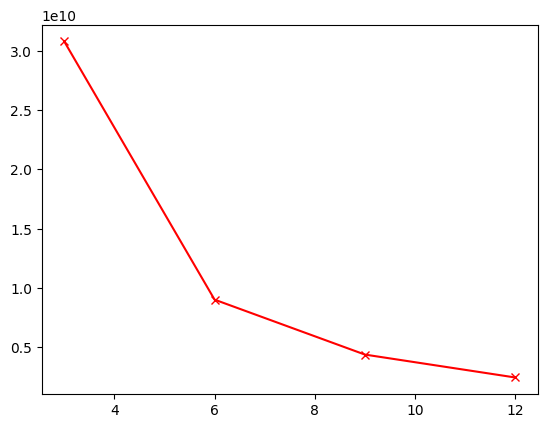

In [ ]:
import matplotlib.pyplot as plt
plt.plot(K,E2,'rx-')

In [ ]:
model = KMeans(n_clusters=6)
model = model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
model.cluster_centers_

array([[ 5.68780539e+00,  8.64470319e+01,  9.61108223e+00, ...,
         1.03960911e-04,  1.03960911e-04,  1.03960911e-04],
       [ 6.01204819e+00,  8.00120482e+01,  1.09819277e+01, ...,
         9.48676901e-20,  9.48676901e-20,  9.48676901e-20],
       [ 5.00000000e+00,  8.30000000e+01,  1.01000000e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+01,  6.00000000e+04,  1.40000000e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.20583942e+00,  7.58569343e+01,  1.07576642e+01, ...,
        -5.14996032e-19, -5.14996032e-19, -5.14996032e-19],
       [ 4.86274510e+00,  8.62745098e+01,  1.10196078e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
model.cluster_centers_[:,5]

array([   86.44703192,    80.01204819,    83.        , 60000.        ,
          75.85693431,    86.2745098 ])

In [ ]:
X1 = X.copy()

In [ ]:
# X1 = df.drop(['game_id',	'description',	'image', 'compilation',	'expansion', 'thumbnail', 'name'], axis=1).fillna("unknow")

In [ ]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Columns: 16707 entries, max_players to publisher_新ボードゲーム党 (New Board Game Party),IELLO,Indie Boards & Cards,minimalGames
dtypes: bool(1864), float64(1), int64(8), uint8(14834)
memory usage: 168.4 MB


In [ ]:
X1['result'] = model.labels_

In [ ]:
X1['real_rating'] = X1['average_rating'] * X1['users_rated']

In [ ]:
X1.groupby('result')['users_rated'].sum()

result
0    3003115
1    1868928
2     534163
3         97
4    2539677
5    1217718
Name: users_rated, dtype: int64

In [ ]:
X1.groupby('result')['real_rating'].sum() / X1.groupby('result')['users_rated'].sum()

result
0    6.525804
1    7.302243
2    7.660882
3    5.628870
4    7.007534
5    7.487608
dtype: float64

FOCUS 0,2,4,5

In [ ]:
X_0 = X1[(X1['result'] == 0)]
X_2 = X1[(X1['result'] == 2)]
X_4 = X1[(X1['result'] == 4)]
X_5 = X1[(X1['result'] == 5)]

In [ ]:
X2 = [X_0, X_2, X_4, X_5]

In [ ]:
df.columns

Index(['game_id', 'description', 'image', 'max_players', 'max_playtime',
       'min_age', 'min_players', 'min_playtime', 'name', 'playing_time',
       ...
       'Cuckoo', 'Twilight Imperium', 'Safari', '24 Game', 'Sports: Curling',
       'Animals: Worms', 'Schmidt Spiele Easy Play Line', 'Auf Achse',
       'Cribbage', 'Cities: San Francisco'],
      dtype='object', length=1886)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
print(X.columns.tolist())

['max_players', 'max_playtime', 'min_age', 'min_players', 'min_playtime', 'playing_time', 'year_published', 'average_rating', 'users_rated', 'Medical', 'Vietnam War', 'Racing', 'Renaissance', 'American Indian Wars', 'American West', 'Aviation / Flight', 'Civilization', 'Adventure', 'Environmental', 'Maze', 'City Building', 'Mythology', 'Movies / TV / Radio theme', 'Video Game Theme', 'Trains', 'Ancient', 'Prehistoric', 'Sports', 'Horror', 'Miniatures', 'Transportation', 'Electronic', 'Wargame', 'World War I', 'Political', 'Spies/Secret Agents', 'American Civil War', 'Pike and Shot', 'Party Game', 'Farming', 'Action / Dexterity', 'Real-time', 'Medieval', "Children's Game", 'Music', 'Arabian', 'Print & Play', 'Negotiation', 'Collectible Components', 'Pirates', 'Fantasy', 'Space Exploration', 'Animals', 'Deduction', 'Number', 'Korean War', 'Civil War', 'Card Game', 'Fighting', 'Zombies', 'Exploration', 'Book', 'Modern Warfare', 'Age of Reason', 'Mature / Adult', 'Comic Book / Strip', 'Abs

In [ ]:
for group in X2:
  dic_cate = {}
  dic_mech = {}
  dic_fam = {}
  dic_art = {}
  dic_de = {}
  # dic_pub = {}
  # print("-------------------------------------------")
  print("-------------------------------------------")
  for col in group.columns:
    if (group[col].dtype == "int64" or group[col].dtype == 'float64'):
      print(col, " : ", "{:.3f}".format(group[col].mean()))
    if col in category:
      dic_cate[col] = group[col].sum()
      top_cate = sorted(dic_cate.items(), key=lambda x: x[1], reverse=True)[0:5]
    if col in mechanic:
      dic_mech[col] = group[col].sum()
      top_mech = sorted(dic_mech.items(), key=lambda x: x[1], reverse=True)[0:5]
    if col in family:
      dic_fam[col] = group[col].sum()
      top_fam = sorted(dic_fam.items(), key=lambda x: x[1], reverse=True)[0:5]
    if col in artist:
      dic_art[col] = group[col].sum()
      top_art = sorted(dic_art.items(), key=lambda x: x[1], reverse=True)[0:5]
    if col in designer:
      dic_de[col] = group[col].sum()
      top_de = sorted(dic_de.items(), key=lambda x: x[1], reverse=True)[0:5]
    # if col in publisher:
    #   dic_pub[col] = group[col].sum()
    #   top_pub = sorted(dic_pub.items(), key=lambda x: x[1], reverse=True)[0:5]
  print("category : ", top_cate)
  print("mechanic : ", top_mech)
  print("family : ", top_fam)
  print("artist : ", top_art)
  print("designer : ", top_de)
  # print("publisher : ", top_pub)
  print("-------------------------------------------")
  print("")

-------------------------------------------
max_players  :  5.688
max_playtime  :  86.447
min_age  :  9.611
min_players  :  2.070
min_playtime  :  76.408
playing_time  :  86.447
year_published  :  2002.858
average_rating  :  6.304
users_rated  :  312.207
real_rating  :  2037.399
category :  [('Card Game', 2725), ('Wargame', 1961), ('Fantasy', 1058), ('Party Game', 767), ('Dice', 764)]
mechanic :  [('Dice Rolling', 2163), ('Hand Management', 1806), ('Hex-and-Counter', 1233), ('Set Collection', 1146), ('Variable Player Powers', 989)]
family :  [('Crowdfunding: Kickstarter', 949), ('Admin: Better Description Needed!', 592), ('Solitaire Games', 305), ('3D Games', 156), ('Magazine: Strategy & Tactics', 146)]
artist :  [('artist_Franz Vohwinkel', 138), ('artist_(Uncredited)', 132), ('artist_Redmond A. Simonsen', 113), ('artist_Michael Menzel', 66), ('artist_Rodger B. MacGowan', 51)]
designer :  [('designer_(Uncredited)', 554), ('designer_Reiner Knizia', 182), ('designer_Jim Dunnigan', 55), (

#Solution

In [ ]:
solution1 = {"min_players":[2], "max_players":[5], "min_playtime":[75],
             "max_playtime":[85], "playing_time":[85], "min_age":[10],
            "category":["Card Game,Fantasy,Wargame,Party Game"],
             "year_published":[2023],
            "mechanic":["Hand Management,Variable Player Powers,Set Collection,Hex-and-Counter"],
            "artist":["Franz Vohwinkel,Redmond A. Simonsen"],
            "designer":["Reiner Knizia,Jim Dunnigan,Richard H. Berg"],
             "family":["3D Games,Magazine: Strategy & Tactics"]}
solution1 = pd.DataFrame(solution1)
solution1

,min_players,max_players,min_playtime,max_playtime,playing_time,min_age,category,year_published,mechanic,artist,designer,family
0,2,5,75,85,85,10,"Card Game,Fantasy,Wargame,Party Game",2023,"Hand Management,Variable Player Powers,Set Collection,Hex-and-Counter","Franz Vohwinkel,Redmond A. Simonsen","Reiner Knizia,Jim Dunnigan,Richard H. Berg","3D Games,Magazine: Strategy & Tactics"


In [ ]:
solution2 = {"min_players":[2], "max_players":[5], "min_playtime":[50],
             "max_playtime":[85], "playing_time":[85], "min_age":[10],
             "year_published":[2023],
            "category":["City Building,Economic,Medieval,Farming"],
            "mechanic":["Hand Management,Variable Player Powers,Route/Network Building"],
            "artist":["Miguel Coimbra"],
            "designer":[np.nan],
             "family":["Tableau Building"]}
solution2 = pd.DataFrame(solution2)
solution2

,min_players,max_players,min_playtime,max_playtime,playing_time,min_age,year_published,category,mechanic,artist,designer,family
0,2,5,50,85,85,10,2023,"City Building,Economic,Medieval,Farming","Hand Management,Variable Player Powers,Route/Network Building",Miguel Coimbra,NaN,Tableau Building


In [ ]:
solution3 = {"min_players":[2], "max_players":[5], "min_playtime":[60],
             "max_playtime":[75], "playing_time":[75], "min_age":[10],
             "year_published":[2023],
            "category":["Card Game,Fighting,Fantasy"],
            "mechanic":["Hand Management,Area Control / Area Influence,Dice Rolling"],
             "artist":["Klemens Franz"],
            "designer":["Richard Garfield,Uwe Rosenberg,Vlaada Chvátil"],
             "family":["Solitaire Games"]}
solution3 = pd.DataFrame(solution3)
solution3

,min_players,max_players,min_playtime,max_playtime,playing_time,min_age,category,mechanic,artist,designer,family
0,2,5,60,75,75,10,"Card Game,Fighting,Fantasy","Hand Management,Area Control / Area Influence,Dice Rolling",Klemens Franz,"Richard Garfield,Uwe Rosenberg,Vlaada Chvátil",Solitaire Games


In [ ]:
solution4 = {"min_players":[2], "max_players":[5], "min_playtime":[50],
             "max_playtime":[85], "playing_time":[85], "min_age":[10],
             "year_published":[2023],
            "category":["Card Game,Bluffing,Science Fiction"],
            "mechanic":["Hand Management,Variable Player Powers,Set Collection,Card Drafting"],
             "artist":["Arnaud Demaegd,Doris Matthäus"],
            "designer":["Reiner Knizia,Stefan Feld"],
             "family":[np.nan]}
solution4 = pd.DataFrame(solution4)
solution4

,min_players,max_players,min_playtime,max_playtime,playing_time,min_age,year_published,category,mechanic,artist,designer,family
0,2,5,50,85,85,10,2023,"Card Game,Bluffing,Science Fiction","Hand Management,Variable Player Powers,Set Collection,Card Drafting","Arnaud Demaegd,Doris Matthäus","Reiner Knizia,Stefan Feld",NaN


In [ ]:
solution = pd.concat([solution1, solution2, solution3, solution4])
solution

,min_players,max_players,min_playtime,max_playtime,playing_time,min_age,category,year_published,mechanic,artist,designer,family
0,2,5,75,85,85,10,"Card Game,Fantasy,Wargame,Party Game",2023.0,"Hand Management,Variable Player Powers,Set Collection,Hex-and-Counter","Franz Vohwinkel,Redmond A. Simonsen","Reiner Knizia,Jim Dunnigan,Richard H. Berg","3D Games,Magazine: Strategy & Tactics"
0,2,5,50,85,85,10,"City Building,Economic,Medieval,Farming",NaN,"Hand Management,Variable Player Powers,Route/Network Building",NaN,NaN,Tableau Building
0,2,5,60,75,75,10,"Card Game,Fighting,Fantasy",NaN,"Hand Management,Area Control / Area Influence,Dice Rolling",Klemens Franz,"Richard Garfield,Uwe Rosenberg,Vlaada Chvátil",Solitaire Games
0,2,5,50,85,85,10,"Card Game,Bluffing,Science Fiction",NaN,"Hand Management,Variable Player Powers,Set Collection,Card Drafting","Franz Vohwinkel,Michael Menzel","Reiner Knizia,Stefan Feld",NaN
